In [3]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,skew,normaltest

# Q1. Perform basic EDA 

In [5]:
## 1.Loading dataset
data=pd.read_csv('house_price.csv')
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
## 2.Checking for basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [7]:
##3.Checking for null values
data.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [10]:
# No null values 

In [14]:
# Changing the datatype of 'bath' as 'int'

In [16]:
data['bath'] = data['bath'].astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  int32  
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 670.4+ KB


In [20]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [22]:
data['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [24]:
## 4.checking for duplicate
data.duplicated().sum()

1049

In [26]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

               location       size  total_sqft  bath   price  bhk  \
239          Chandapura      1 BHK       645.0     1   16.45    1   
735               other      2 BHK      1100.0     2   48.00    2   
874          Chandapura      2 BHK      1015.0     2   25.88    2   
882          Whitefield      2 BHK      1116.0     2   51.91    2   
892      Kanakpura Road      1 BHK       525.0     1   26.00    1   
...                 ...        ...         ...   ...     ...  ...   
13179        Whitefield      4 BHK      2856.0     5  154.50    4   
13186             other  4 Bedroom      1200.0     5  325.00    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0     9  250.00    7   
13193       Uttarahalli      3 BHK      1345.0     2   57.00    3   
13199      Doddathoguru      1 BHK       550.0     1   17.00    1   

       price_per_sqft  
239              2550  
735              4363  
874              2549  
882              4651  
892              4952  
...               ...  
131

In [28]:
## 5. Removing duplicate rows
data.drop_duplicates(inplace=True)

In [30]:
data.duplicated().sum()                     # Rechecking for duplicate rows

0

In [32]:
## 6.Dropping unnecessary column size(as bhk is already available)
data.drop(columns=['size'],inplace=True)
data.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,2600.0,5,120.00,4,4615
2,Uttarahalli,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,1521.0,3,95.00,3,6245
4,Kothanur,1200.0,2,51.00,2,4250


# Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 


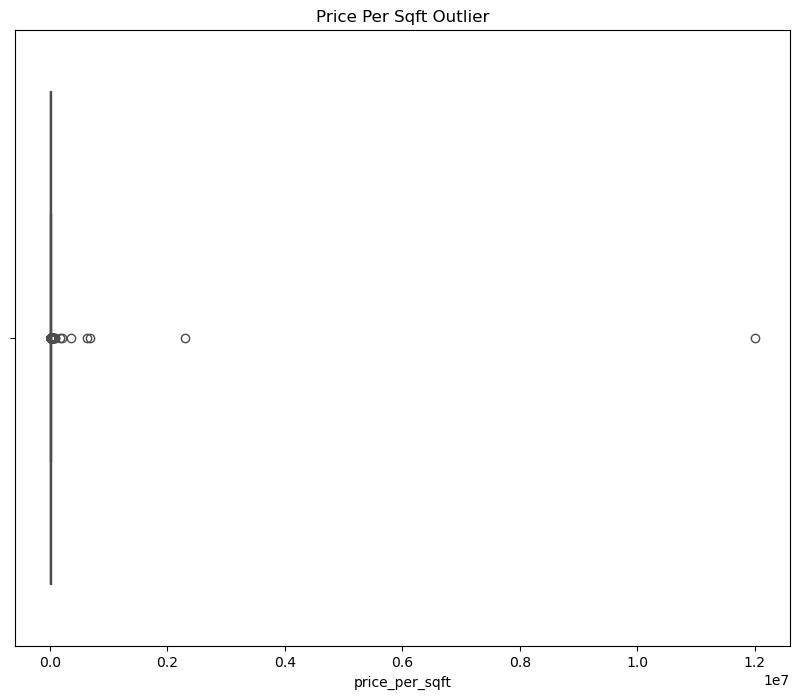

In [35]:
# Check for Outliers for the column 'price per sqft'
# Using box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x=data['price_per_sqft'],color = 'red').set_title('Price Per Sqft Outlier')
plt.show()

In [37]:
# Detecting Outliers
mean = data['price_per_sqft'].mean()
std_dev = data['price_per_sqft'].std()
print(f"Mean :{mean} and Standard Deviation :{std_dev}")

lower_bound_std = mean - 3 * std_dev
upper_bound_std = mean + 3 * std_dev
print("Lower boundary std",lower_bound_std)
print("Upper boundary std",upper_bound_std)

# Handling Outliers
# 1.Trimming
data_std = data.copy()
data_std = data[(data['price_per_sqft'] >= lower_bound_std) & 
           (data['price_per_sqft'] <= upper_bound_std)] # contain data that falls within lower boundary and less than higher bound.

comparison_df = pd.DataFrame({'Original Data':data['price_per_sqft'].describe() , 'After Outlier Removal':data_std['price_per_sqft'].describe()})
comparison_df


Mean :8132.641840177763 and Standard Deviation :111232.9008957087
Lower boundary std -325566.06084694836
Upper boundary std 341831.3445273039


,Original Data,After Outlier Removal
count,1.215100e+04,12146.000000
mean,8.132642e+03,6821.889593
std,1.112329e+05,4988.483439
min,2.670000e+02,267.000000
25%,4.312000e+03,4312.000000
50%,5.500000e+03,5500.000000
75%,7.461000e+03,7456.750000
max,1.200000e+07,200000.000000


In [39]:
# Detecting Outliers
data_percentile = data.copy()
lower_percentile = np.percentile(data['price_per_sqft'], 5)
upper_percentile = np.percentile(data['price_per_sqft'], 95)
print("Lower Percentile",lower_percentile)
print("Upper Percentile",upper_percentile)

# Handling Outliers
# 1.Capping

data_percentile['price_per_sqft'] = np.where(
    data_percentile['price_per_sqft'] > upper_percentile, upper_percentile, data_percentile['price_per_sqft']
)
data_percentile['price_per_sqft'] = np.where(
    data_percentile['price_per_sqft'] < lower_percentile, lower_percentile, data_percentile['price_per_sqft']
)

comparison_df = pd.DataFrame({'Original Data':data['price_per_sqft'].describe() , 'After Outlier Removal':data_percentile['price_per_sqft'].describe()})
comparison_df

Lower Percentile 3150.0
Upper Percentile 15600.0


,Original Data,After Outlier Removal
count,1.215100e+04,12151.000000
mean,8.132642e+03,6551.178175
std,1.112329e+05,3278.243151
min,2.670000e+02,3150.000000
25%,4.312000e+03,4312.000000
50%,5.500000e+03,5500.000000
75%,7.461000e+03,7461.000000
max,1.200000e+07,15600.000000


In [41]:

# Detecting Outliers
Q1,Q3=np.percentile(data['price_per_sqft'],[25,75])
IQR = Q3 - Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Q1:",Q1)
print("Q3:",Q3)
print("Lower Bound:",lower_bound)
print("Upper Bound",upper_bound)

#Handling Outliers
# 1.Imputing with median
data_IQR= data.copy()

median_IQR = data['price_per_sqft'].median()

# Replace outliers with median

data_IQR['price_per_sqft'] = np.where(data_IQR['price_per_sqft'] > upper_bound, median_IQR, data_IQR['price_per_sqft'])
data_IQR['price_per_sqft'] = np.where(data_IQR['price_per_sqft'] < lower_bound, median_IQR, data_IQR['price_per_sqft'])

comparison_df = pd.DataFrame({'Original Data':data['price_per_sqft'].describe() , 'After Outlier Removal':data_IQR['price_per_sqft'].describe()})
comparison_df

Q1: 4312.0
Q3: 7461.0
Lower Bound: -411.5
Upper Bound 12184.5


,Original Data,After Outlier Removal
count,1.215100e+04,12151.000000
mean,8.132642e+03,5662.487120
std,1.112329e+05,1946.407247
min,2.670000e+02,267.000000
25%,4.312000e+03,4312.000000
50%,5.500000e+03,5500.000000
75%,7.461000e+03,6517.000000
max,1.200000e+07,12173.000000


In [43]:
data_zscore = data.copy()
data_zscore['z_score'] = zscore(data_zscore['price_per_sqft'])


threshold = 3

# Handling Outliers using Capping

upper_bound = data_zscore['price_per_sqft'].mean() + (threshold * data_zscore['price_per_sqft'].std())
lower_bound = data_zscore['price_per_sqft'].mean() - (threshold * data_zscore['price_per_sqft'].std())

# Capping
data_zscore['price_per_sqft'] = np.where(data_zscore['z_score'] > threshold, upper_bound, data_zscore['price_per_sqft'])
data_zscore['price_per_sqft'] = np.where(data_zscore['z_score'] < -threshold, lower_bound, data_zscore['price_per_sqft'])
comparison_df = pd.DataFrame({'Original Data':data['price_per_sqft'].describe() , 'After Outlier Removal':data_zscore['price_per_sqft'].describe()})
comparison_df

,Original Data,After Outlier Removal
count,1.215100e+04,12151.000000
mean,8.132642e+03,6959.742221
std,1.112329e+05,8428.609370
min,2.670000e+02,267.000000
25%,4.312000e+03,4312.000000
50%,5.500000e+03,5500.000000
75%,7.461000e+03,7461.000000
max,1.200000e+07,341831.344527


# Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? 

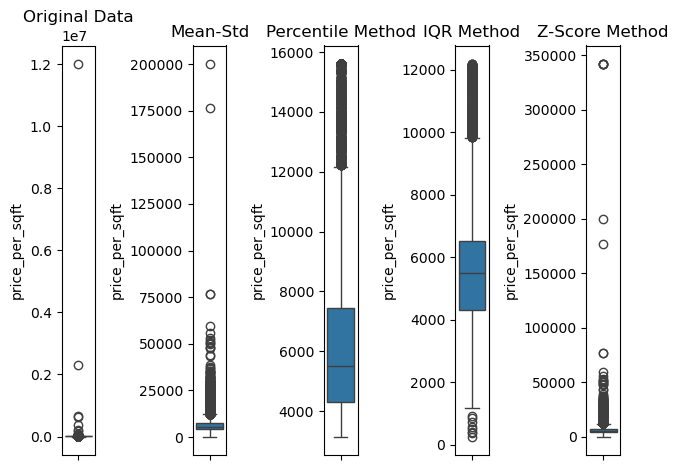

In [46]:
plt.subplot(1,5,1)
sns.boxplot(data['price_per_sqft'])
plt.title("Original Data")

plt.subplot(1, 5, 2)
sns.boxplot(data_std['price_per_sqft'])
plt.title("Mean-Std")

plt.subplot(1, 5, 3)
sns.boxplot(data_percentile['price_per_sqft'])
plt.title("Percentile Method")

plt.subplot(1, 5, 4)
sns.boxplot(data_IQR['price_per_sqft'])
plt.title("IQR Method")

plt.subplot(1, 5, 5)
sns.boxplot(data_zscore['price_per_sqft'])
plt.title("Z-Score Method")

plt.tight_layout()
plt.show()

# Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 

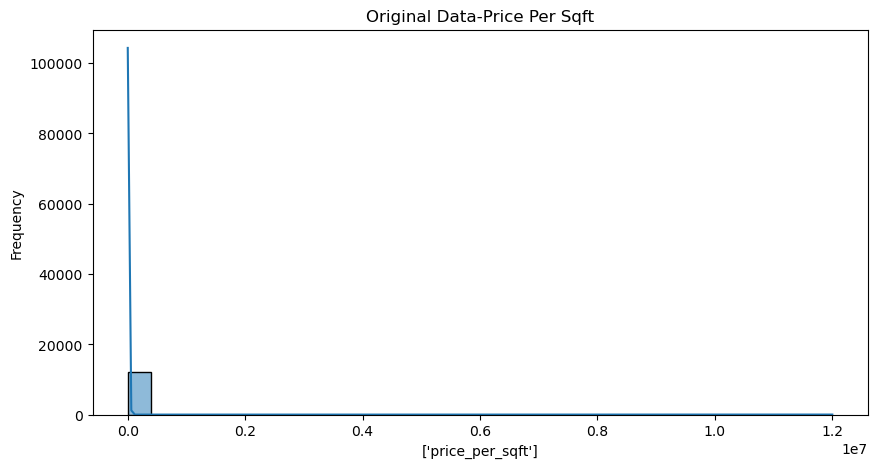

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(data['price_per_sqft'], bins=30, kde=True)
plt.title('Original Data-Price Per Sqft')
plt.xlabel(['price_per_sqft'])
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Findig skewness and kurtosis

In [55]:
skew_original = data['price_per_sqft'].skew()
kurt_original = data['price_per_sqft'].kurt()
print(skew_original)
print(kurt_original)

103.90203228991889
11135.81306761006


In [57]:
# Removing skewness

In [59]:
data['price_per_sqft_log'] = np.log1p(data['price_per_sqft'])

In [61]:
# After transformation

In [63]:
skew_log = data['price_per_sqft_log'].skew()
kurt_log = data['price_per_sqft_log'].kurt()

In [85]:
print(f"Skewness before transformation: {skew_original}\t Skewness after transformation:{skew_log}")
print(f"Kurtosis before transformation: {kurt_original}\t Kurtosis after transformation:{kurt_log}")

Skewness before transformation: 103.90203228991889	 Skewness after transformation:1.401043314411164
Kurtosis before transformation: 11135.81306761006	 Kurtosis after transformation:9.408799464773509


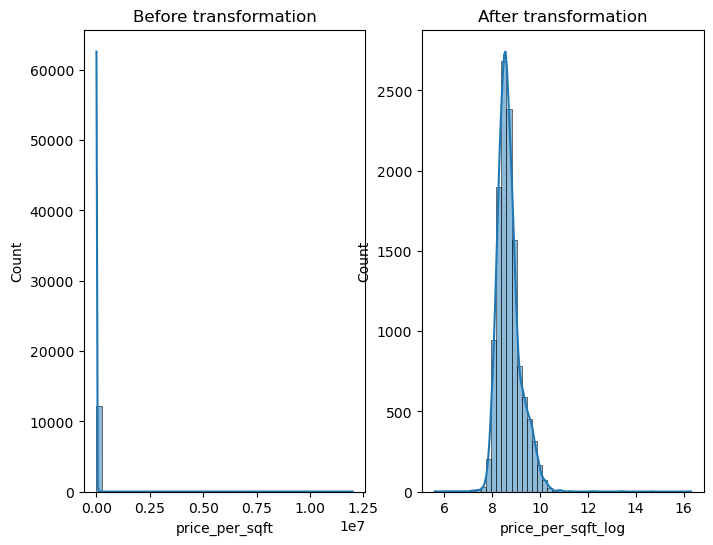

In [67]:
fig, axes = plt.subplots(1,2,figsize=(8,6))
sns.histplot(data['price_per_sqft'], ax = axes[0],bins=50,kde=True).set_title('Before transformation')
sns.histplot(data['price_per_sqft_log'], ax = axes[1],bins=50,kde=True).set_title('After transformation')
plt.show()

In [89]:
# Performing Normality Test
stat, p = normaltest(data['price_per_sqft_log'])
print("Normality Test p-value:", p)

if p < 0.05:
    print("Data is not normally distributed.")
else:
    print("Data is normally distributed.")


Normality Test p-value: 0.0
Data is not normally distributed.


In [ ]:
Null Hypothesis (H₀) – Data is Normally Distributed
Alternate Hypothesis (H₁) – Data is NOT Normally Distributed

p < 0.05 → Reject the null hypothesis (H₀) → Data is not normally distributed.
p ≥ 0.05 → Accept the null hypothesis (H₀) → Data is normally distributed.
In the above case, p value is less than 0.05 hence Null hypothesis is rejected.

# Q5. Check the correlation between all the numerical columns and plot heatmap

Correlation Matrix:
                     total_sqft      bath     price       bhk  price_per_sqft  \
total_sqft            1.000000  0.386694  0.572516  0.339936       -0.008877   
bath                  0.386694  1.000000  0.448802  0.898875        0.030133   
price                 0.572516  0.448802  1.000000  0.390008        0.027415   
bhk                   0.339936  0.898875  0.390008  1.000000        0.030294   
price_per_sqft       -0.008877  0.030133  0.027415  0.030294        1.000000   
price_per_sqft_log    0.100041  0.424472  0.581649  0.405748        0.205213   

                    price_per_sqft_log  
total_sqft                    0.100041  
bath                          0.424472  
price                         0.581649  
bhk                           0.405748  
price_per_sqft                0.205213  
price_per_sqft_log            1.000000  


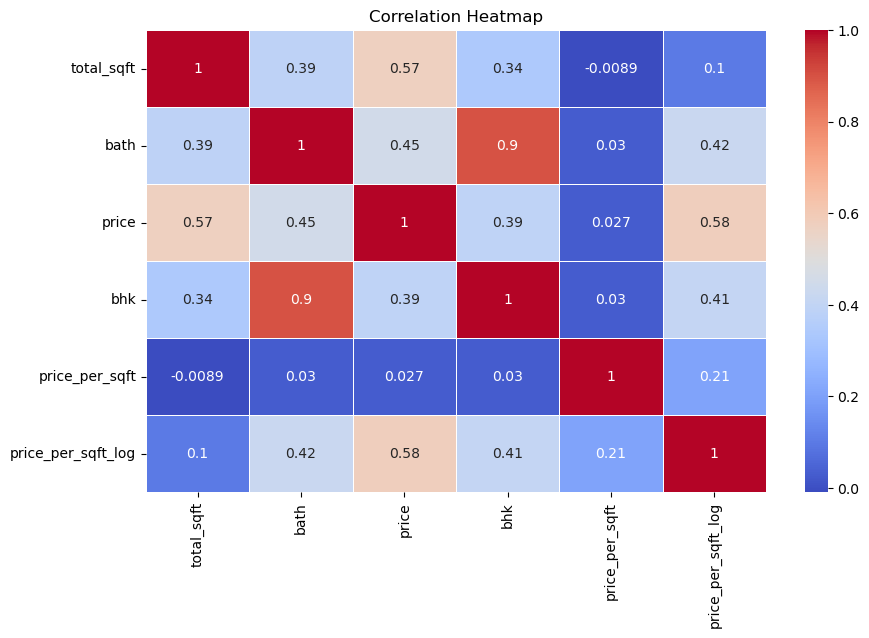

In [97]:

correlation_matrix = numeric_data.corr()                    # to find correlation b/w all numerical columns
print("Correlation Matrix:\n", correlation_matrix)


plt.figure(figsize=(10, 6))                                  # Heat map for corelation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Q6. Draw Scatter plot between the variables to check the correlation between them

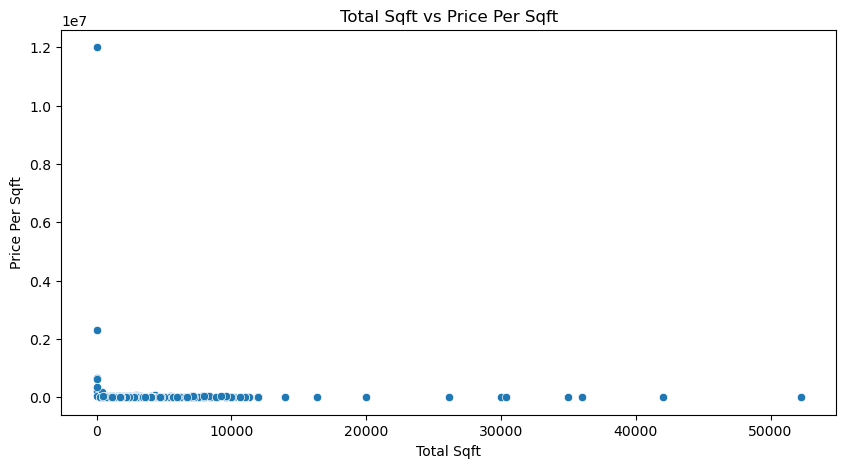

In [382]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['total_sqft'], y=data['price_per_sqft'])
plt.title("Total Sqft vs Price Per Sqft")
plt.xlabel("Total Sqft")
plt.ylabel("Price Per Sqft")
plt.show()